In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

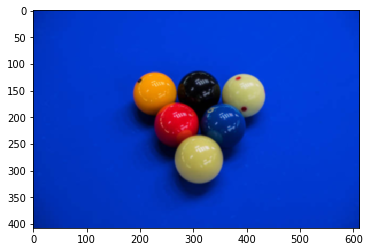

In [40]:
path = './sample/2.jpg'
img = cv2.imread(path)
img = cv2.GaussianBlur(img,(5,5),0)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [47]:
#default setting for red
#lower_red=np.array([0, 50, 50])
#upper_red=np.array([10, 255, 255])

lower_red=np.array([169, 100, 100])             
upper_red=np.array([189, 255, 255])

mask_red=cv2.inRange(hsv,lower_red,upper_red)
res_red=cv2.bitwise_and(img,img,mask=mask_red)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


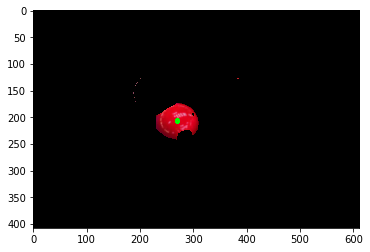

In [48]:
plt.imshow(res_red)
#print res_red[100:110, 100:110]
print mask_red[100:110, 100:110]
arr = np.array(mask_red)

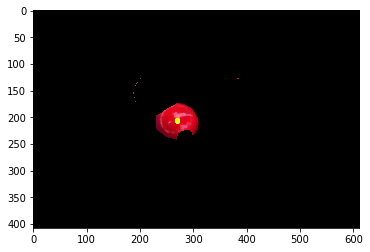

In [49]:
kernel = np.ones((7,7), np.uint8)
img_dilation = cv2.dilate(res_red, kernel, iterations=1)
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
plt.imshow(img_erosion)


In [50]:
#points = np.argwhere(mask_red)
points = np.argwhere(img_erosion)

In [51]:
x_mean = int(np.mean(points[:,0]))
y_mean = int(np.mean(points[:,1]))


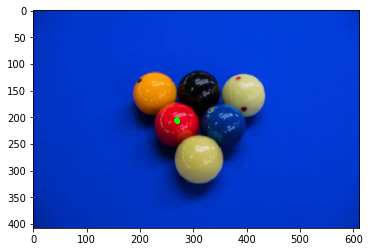

In [52]:
cv2.circle(img, (y_mean, x_mean),3,(0,255,0),3,1)
plt.imshow(img)